# **Test PRNP / MM**

Acest test va evalua cunoștințele acumulate în cadrul laboratoarelor 1-3:
+ Laboratorul 1: Introducere în Data Science
+ Laboratorul 2: Web Scraping & Regex
+ Laboratorul 3: Analiză univariată și bivariată a datelor


## **Exercițiul 1 (4p)**

#### Fișierul **Laptopuri.html** conține o pagină web cu **40** de anunțuri de vânzare pentru laptopuri second-hand. Deschideți pagina folosind un browser și inspectați structura acesteia. Folosind biblioteca **lxml**, extrageți **lista de anunțuri** și următoarele informații pentru fiecare anunț:

+ Desciere produs
+ Preț
+ Diagonala (inch)
+ Tehnologie display
+ Model Procesor
+ Frecventa procesor
+ Capacitate RÂM
+ Capacitate HDD

**(3p) Afișați lista de obiecte creată.**

**(1p) Creați un dataframe și afișațil.**

**Hints:**
+ Numărul total de produse este **40**
+ Folosiți **pprint.pprint()** pentru a afisa lista de dictionare creata.


#### **(3p)** Afișați lista de obiecte creată.


In [45]:
import lxml.html as html
import lxml
import pandas as pd
import re
import pprint
import numpy
from bs4 import BeautifulSoup


In [46]:
html_data = open('Laptopuri.html', 'r', encoding="utf8").read()

soup = BeautifulSoup(html_data, 'html.parser')
cleaned_html = soup.prettify()

tree = lxml.html.fromstring(cleaned_html)

app_list =  tree.find_class('item product-layout')

prop_list = []

def extract_info(info : str):
    diag =  re.search(r'Diagonala \(inch\)\s*:\s*(\d+).*', info)
    display = re.search(r'Tehnologie display\s*:\s*([a-zA-Z0-9\-]+).*', info)
    cpu_model = re.search(r'Model Procesor\s*:\s*([a-zA-Z0-9 \-]+).*', info)
    cpu_freq = re.search(r'Frecventa procesor \(GHz\)\s*:\s*(\d+\.\d+).*', info)
    ram = re.search(r'Capacitate RAM\s*:\s*(\d+).*', info)
    hdd = re.search(r'Capacitate HDD\s*:\s*(\d+)', info)

    return diag.group(1) if diag else numpy.nan, \
           display.group(1) if display else numpy.nan, \
           cpu_model.group(1) if cpu_model else numpy.nan, \
           cpu_freq.group(1) if cpu_freq else numpy.nan, \
           ram.group(1) if ram else numpy.nan, \
           hdd.group(1) if hdd else numpy.nan

for app in app_list:
    description = app.find_class('name')
    if len(description) > 0:
        description = str(description[0].text_content()).strip().replace('\n', '')
    
    price = app.find_class('price')
    if len(price) > 0:
        price = str(price[0].text_content()).strip().replace('\n', '')
    
    info = app.find_class('description')
    if len(price) > 0:
        info = str(info[0].text_content()).strip().replace('\n', '')

    diagonal, display_tech, processor, processor_freq, ram, hdd = extract_info(info)

    prop_list.append({
        'description': description,
        'price': price,
        'diagonal': diagonal,
        'display_tech': display_tech,
        'processor': processor,
        'processor_freq': processor_freq,
        'ram': ram,
        'hdd': hdd
    })

app_df = pd.DataFrame(prop_list)
app_df

,description,price,diagonal,display_tech,processor,processor_freq,ram,hdd
0,"Laptop Second Hand LENOVO ThinkPad T450s, Inte...",449 00 ...,14,Anti-Glare,Intel Core i5-5200U ...,2.20,8,256
1,"Laptop Second Hand HP EliteBook 8740w, Intel C...",490 00 ...,17,WUXGA,Intel Core i5-520M ...,2.40,4,128
2,"Laptop Second Hand LENOVO ThinkPad T460, Intel...",557 34 ...,14,Anti-Glare,Intel Core i3-6100U ...,2.30,8,240
3,"Laptop Second Hand Fujitsu Lifebook E746, Inte...",629 00 ...,14,NaN,Intel Core i5 6300U ...,2.40,8,256
4,"Laptop Second Hand DELL Latitude 3570, Intel C...",639 00 ...,15,LED,Intel Core i3-6100U ...,2.30,8,256
5,"Laptop Second Hand DELL Latitude E7450, Intel ...",639 00 ...,14,LED,Intel Core i5-5300U ...,2.30,8,128
6,"Laptop Second Hand DELL Latitude 7280, Intel C...",649 00 ...,12,Anti-Glare,Intel Core i5-6300U ...,2.40,8,256
7,"Laptop DELL Latitude E5270, Intel Core i5-6300...",689 00 ...,12,Anti-Glare,Intel Core i5-5300U ...,2.40,8,240
8,"Laptop Second Hand HP EliteBook 8760W, Intel C...",690 00 ...,17,LED,Intel Core i5-2520M ...,2.50,8,256
9,"Laptop Second Hand HP 15-da0361ng, Intel Celer...",699 00 ...,15,LED,Intel Celeron N4000 ...,1.10,4,256


#### **(1p)** Creați un dataframe și afișațil.

## **Exercițiul 2 (3p)**

#### **(1p)** Generați un dataframe cu datasetul **laptop_specs_100.csv**.  


In [47]:
laptop_df = pd.read_csv('laptop_specs_100.csv')
laptop_df.head()

,Model,Pret,Diagonala (inch),Tehnologie Display,Producator Procesor,Model Procesor,Capacitate RAM,Capacitate HDD,Unitate Optica,Camera Web,Greutate
0,Samsung MacBook,3298 RON,14.0,IPS,AMD,Intel Core i7-10750H,8 GB,2TB,Da,Da,1.8 Kg
1,MSI ThinkPad,2876 RON,15.6,IPS,AMD,Intel Core i7-10750H,4 GB,1TB,Nu,Da,1.8 Kg
2,MSI VivoBook,3028 RON,15.6,OLED,Intel,Intel Core i5-10210U,16 GB,256GB,Nu,Nu,1.8 Kg
3,Samsung Swift,3694 RON,13.3,LCD,Intel,Intel Core i7-8565U,32 GB,256GB,Da,Nu,2.5 Kg
4,Dell VivoBook,3495 RON,14.0,OLED,AMD,Intel Core i7-10750H,4 GB,256GB,Da,Nu,1.5 Kg


#### **(1p)** Data cleaning. Folosiți regex pentru a extrage doar numerele din coloanele '**Preț**', '**Capacitate RAM**', '**Capacitate HDD**', '**Greutate**'. Transformați aceste coloane în tipul numeric **float**.

In [48]:
def string_to_float(s : str) -> float:
    if isinstance(s, str):
        match = re.search(r"(\d+)\s(\d*)", s)
        return float(match.group(1) + match.group(2)) if match else numpy.nan
    elif isinstance(s, float):
        return s
    else:
        return numpy.nan

def strings_to_float_with_decimal(s : str) -> float:
    if isinstance(s, str):
        match = re.search(r"(\d+\.?\d*)", s)
        return float(match.group(1)) if match else numpy.nan
    elif isinstance(s, float):
        return s
    else:
        return numpy.nan

laptop_df['Pret'] = laptop_df['Pret'].apply(string_to_float)
laptop_df['Capacitate RAM'] = laptop_df['Capacitate RAM'].apply(string_to_float)
laptop_df['Capacitate HDD'] = laptop_df['Capacitate HDD'].apply(string_to_float)
laptop_df['Greutate'] = laptop_df['Greutate'].apply(strings_to_float_with_decimal)
laptop_df.head()

,Model,Pret,Diagonala (inch),Tehnologie Display,Producator Procesor,Model Procesor,Capacitate RAM,Capacitate HDD,Unitate Optica,Camera Web,Greutate
0,Samsung MacBook,3298.0,14.0,IPS,AMD,Intel Core i7-10750H,8.0,NaN,Da,Da,1.8
1,MSI ThinkPad,2876.0,15.6,IPS,AMD,Intel Core i7-10750H,4.0,NaN,Nu,Da,1.8
2,MSI VivoBook,3028.0,15.6,OLED,Intel,Intel Core i5-10210U,16.0,NaN,Nu,Nu,1.8
3,Samsung Swift,3694.0,13.3,LCD,Intel,Intel Core i7-8565U,32.0,NaN,Da,Nu,2.5
4,Dell VivoBook,3495.0,14.0,OLED,AMD,Intel Core i7-10750H,4.0,NaN,Da,Nu,1.5


#### **(1p)** Afisati acele laptopuri care au **'Tehnologia Dislay'** - OLED, **'Capacitate RAM'** este mai mare de 16 GB, au **'Unitate Optica'**, au **'Camera Web'** si **'Diagonala (inch)'** este mai mare de 15 inch.

In [49]:
laptop_df[(laptop_df['Tehnologie Display'] == 'OLED') & (laptop_df['Capacitate RAM'] > 16.0) & 
          (laptop_df['Unitate Optica'] == 'Da') & (laptop_df['Camera Web'] == 'Da') & (laptop_df['Diagonala (inch)'] > 15)]

,Model,Pret,Diagonala (inch),Tehnologie Display,Producator Procesor,Model Procesor,Capacitate RAM,Capacitate HDD,Unitate Optica,Camera Web,Greutate
23,Acer Pavilion,2298.0,17.3,OLED,AMD,Intel Core i7-8565U,32.0,NaN,Da,Da,1.8
25,Toshiba Pavilion,3615.0,15.6,OLED,Intel,Intel Core i7-10750H,32.0,NaN,Da,Da,2.3


## **Exercițiul 3 (3p)**

### Exercițiile următoare se vor baza pe fișierul '**cereal.xlsx**'.

#### **(1p)** Analiză univariată.

#### **(0.5p)** Efectuați Shapiro-Wilk test pentru coloanele **'calories',	'sodium',	'fiber',	'carbo',	'sugars',	'potass',	'rating'**. Ce puteți concluziona ?

#### **(1p)** Analiză bivariată.

#### **(0.5p)** Calculați matricea de corelație și afișați-o într-un grafic de tip heatmap.

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import pandas as pd

In [51]:
cereal_df = pd.read_excel('cereal.xlsx')
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


#### **(1p)** Analiză univariată

**(0.5p)** Creați histograme în care să afișați media și mediana pentru variabilele **'calories',	'sodium',	'fiber',	'carbo',	'sugars',	'potass',	'rating'**. Ce observați ?

**(0.5p)** Calculați skewness pentru variabilele **'calories',	'sodium',	'fiber',	'carbo',	'sugars',	'potass',	'rating'**.

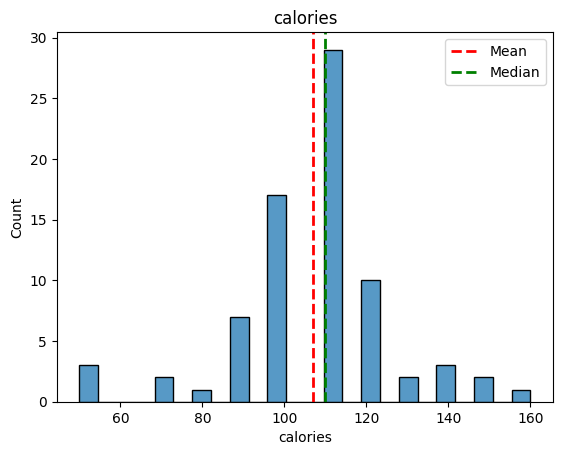

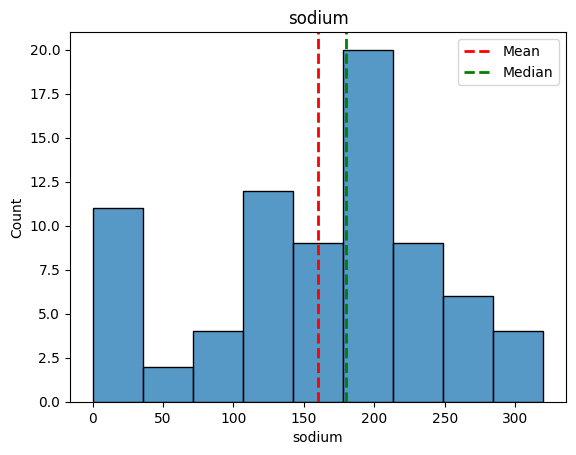

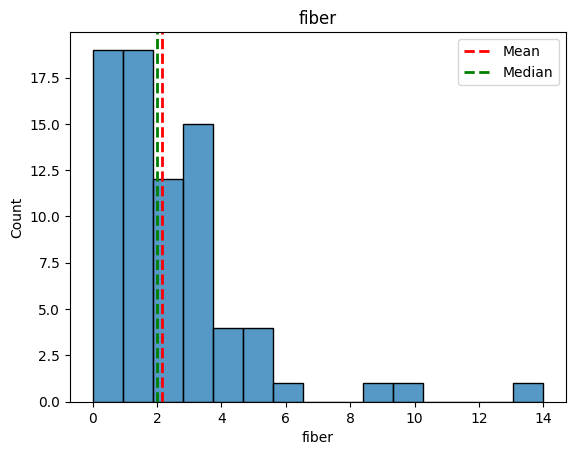

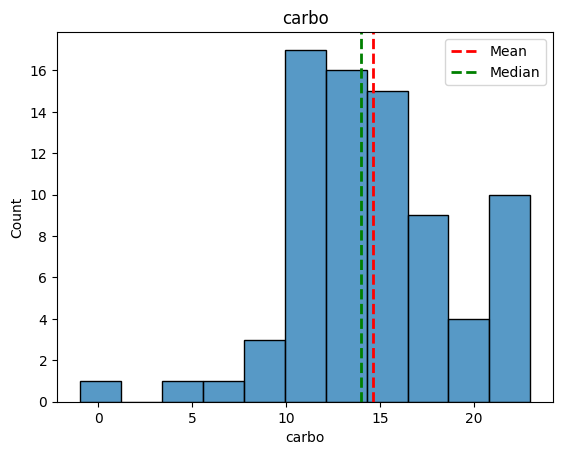

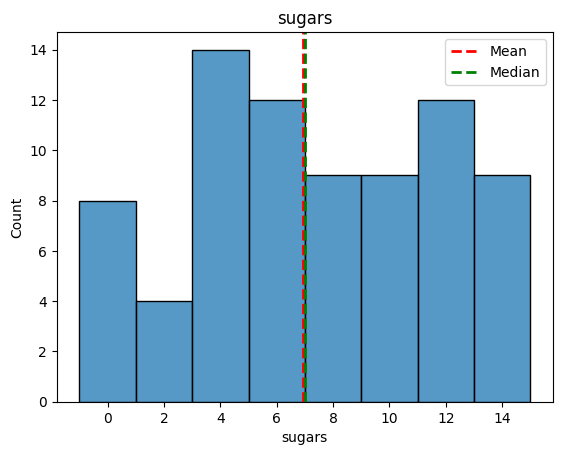

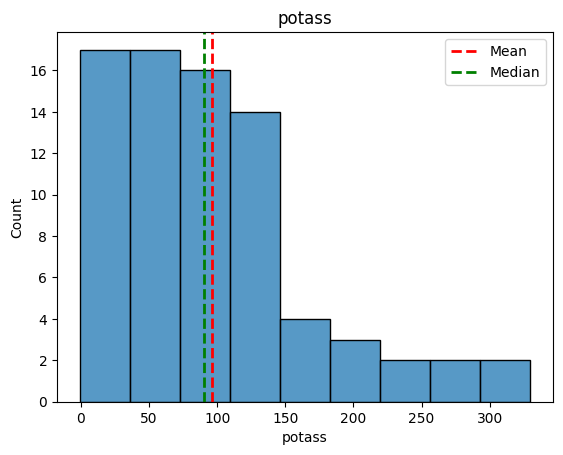

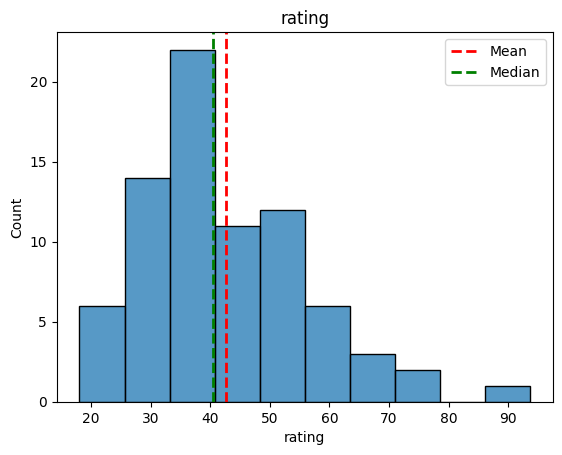

calories   -0.445407
sodium     -0.575711
fiber       2.431675
carbo      -0.447929
sugars      0.034618
potass      1.350971
rating      0.910240
dtype: float64

In [52]:
wanted_data = ['calories', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'rating']
for col in cereal_df[wanted_data]:
    sns.histplot(cereal_df[col])
    plt.title(col)
    plt.axvline(cereal_df[col].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(cereal_df[col].median(), color='g', linestyle='dashed', linewidth=2)
    plt.legend({'Mean':cereal_df[col].mean(),'Median':cereal_df[col].median()})
    plt.show()

# Observatii:
# Din histograme observam ca mean-ul si mediana sunt foarte apropiate la toate variabilele.
# Si ca majoritatea au o distributie usor normala :)

cereal_df[wanted_data].skew()

#### **(0.5p)** Efectuați Shapiro-Wilk test pentru coloanele **'calories',	'sodium',	'fiber',	'carbo',	'sugars',	'potass',	'rating'**. Ce puteți concluziona ?

In [53]:
from scipy import stats

for data in wanted_data:
    _, p = stats.shapiro(cereal_df[data])
    print(data, "p-value = ", p)

# De aici putem concluziona ca [sodium, fiber, sugars, rating] pot avea fi pe o distributie normala,
# iar restul sigur nu sunt


calories p-value =  9.73037084849801e-06
sodium p-value =  0.00034563547220126654
fiber p-value =  8.23361089321392e-10
carbo p-value =  0.022570359254093175
sugars p-value =  0.005922935490841601
potass p-value =  3.4870027576520248e-06
rating p-value =  0.006746472551876235


#### **(1p)** Analiză bivariată

Creați câte un grafic de tip scatter plot pentru fiecare  din următoarele combinații:
* **'calories' - 'sugars'**
* **'calories' - 'rating'**
* **'potass' - 'fiber'**
* **'potass' - 'rating'**
* **'carbo' - 'sodium'**
* **'carbo' - 'rating'**
* **'sugars' - 'rating'**
* **'rating' - 'fiber'**

Ce observați ?




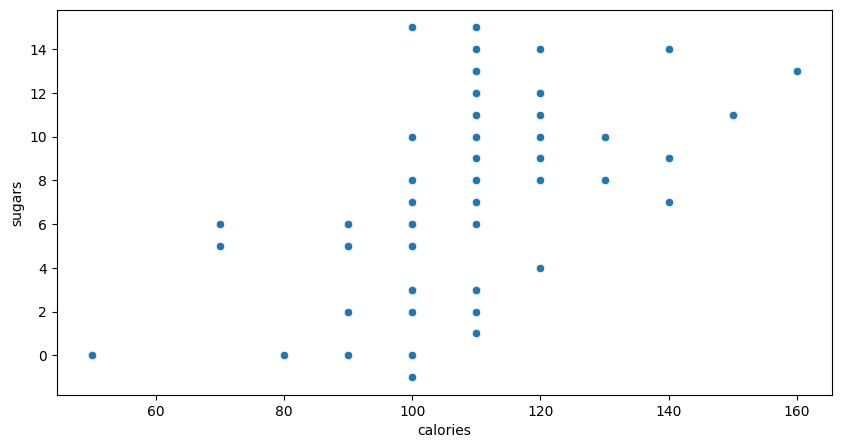

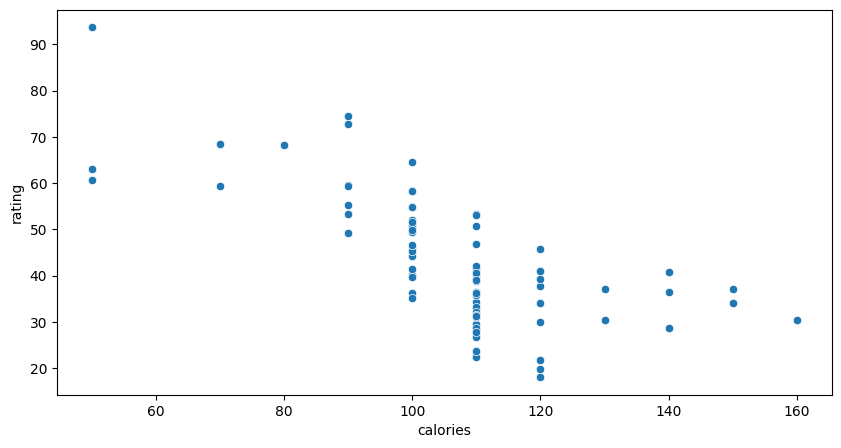

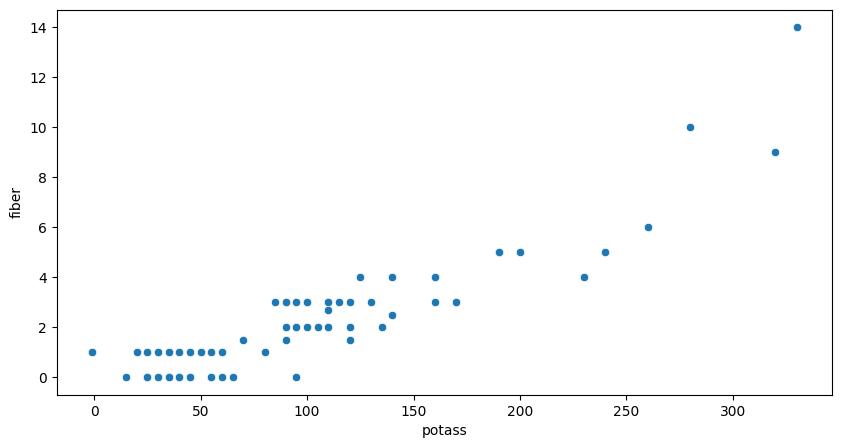

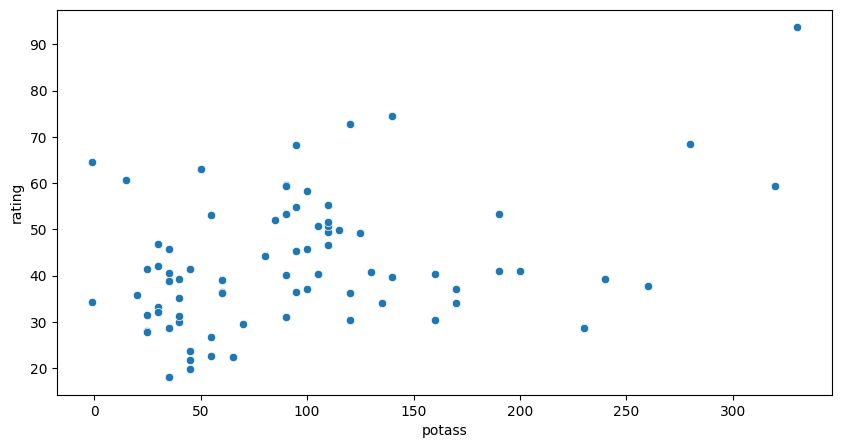

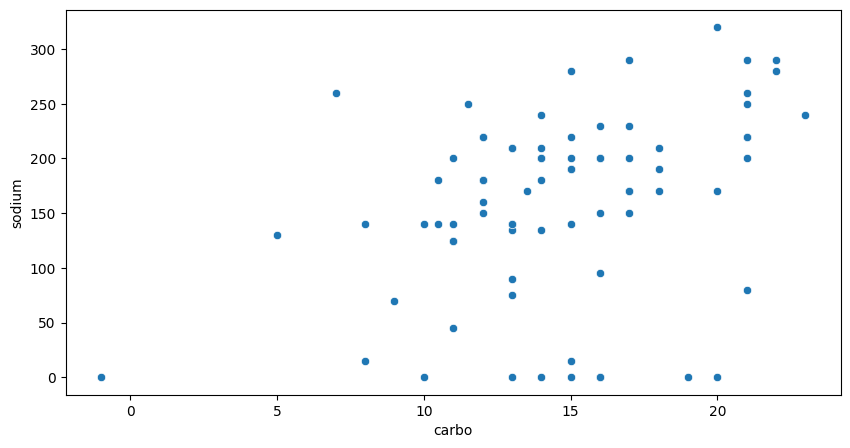

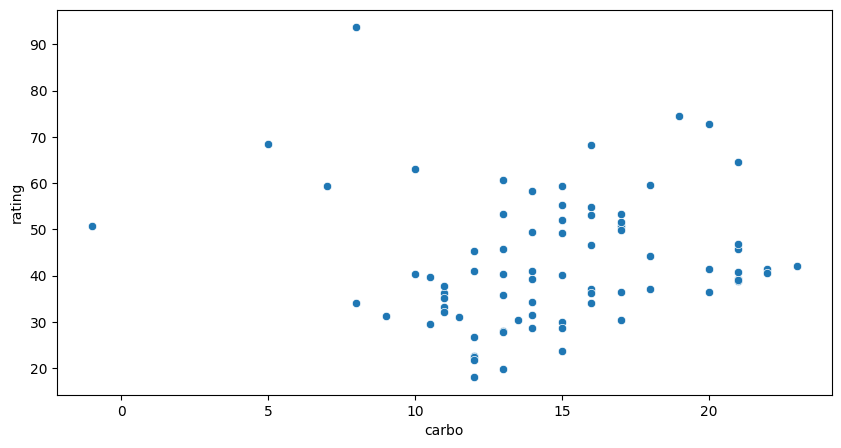

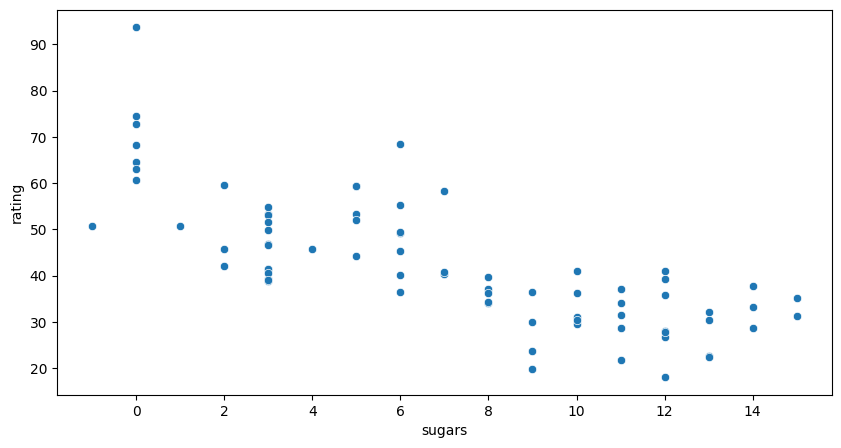

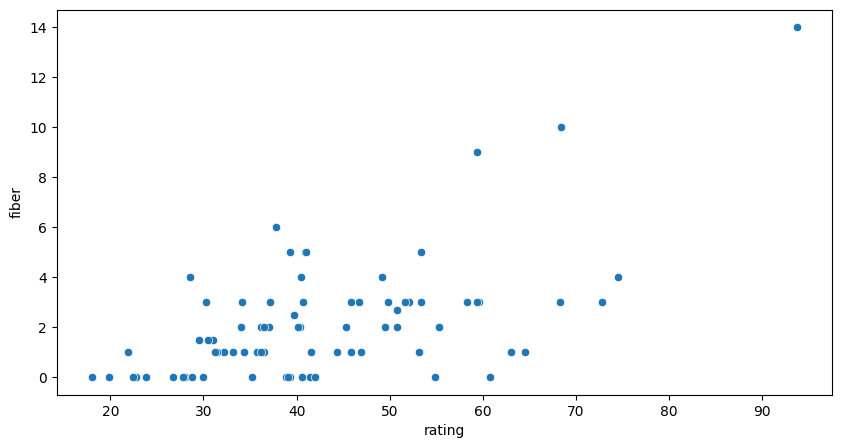

In [54]:
pairs = [['calories', 'sugars'], # Obs: Nu par a corela
['calories', 'rating'], # Obs: Coreleaza usor negativ
['potass', 'fiber'], # Obs: Coreleaza pozitiv
['potass', 'rating'], # Obs: Nu par a corela
['carbo', 'sodium'], # Obs: Nu par a corela
['carbo', 'rating'], # Obs: Nu par a corela
['sugars', 'rating'], # Obs: Coreleaza usor negativ
['rating', 'fiber']] # Obs: Nu par a corela

for pair in pairs:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=pair[0], y=pair[1], data=cereal_df)
    plt.show()


#### **(0.5p)** Creați un grafic de tip heatmap pentru matricea de corelație Pearson. Ce observați ?

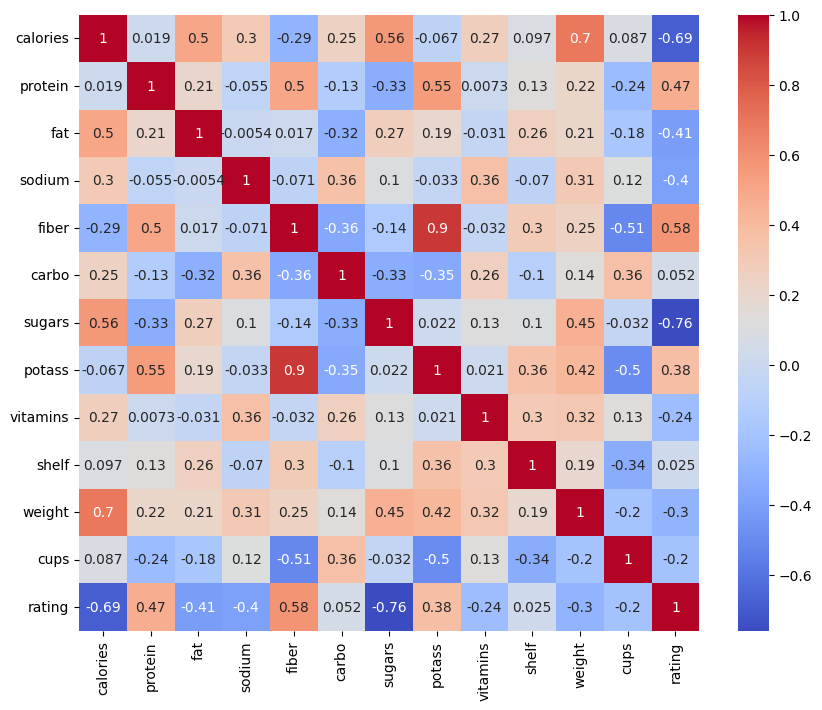

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(cereal_df.select_dtypes(include=[numpy.number]).corr(method='pearson'), annot=True, cmap='coolwarm')
plt.show()

# Observatii:
# calories - weight corelaza pozitiv
# rating - calories coreleaaza negativ
# fiber - potass coreleaza puternic pozitiv
# sugar - rating coreleaza negativ

## **Bonus. PCA (1p)**

**(0.5p)** Normalizați variabilele **'calories', 'protein',	'fat',	'sodium',	'fiber',	'carbo',	'sugars',	'potass',	'vitamins',	'shelf',	'weight',	'cups', 'rating'** folosind MinMaxScaler.

**(0.5p)** Efectuați PCA cu 2 componente si plotați rezultatul intr-un scatterplot. (adaugați **hue** pe coloana cu **'type'**)

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

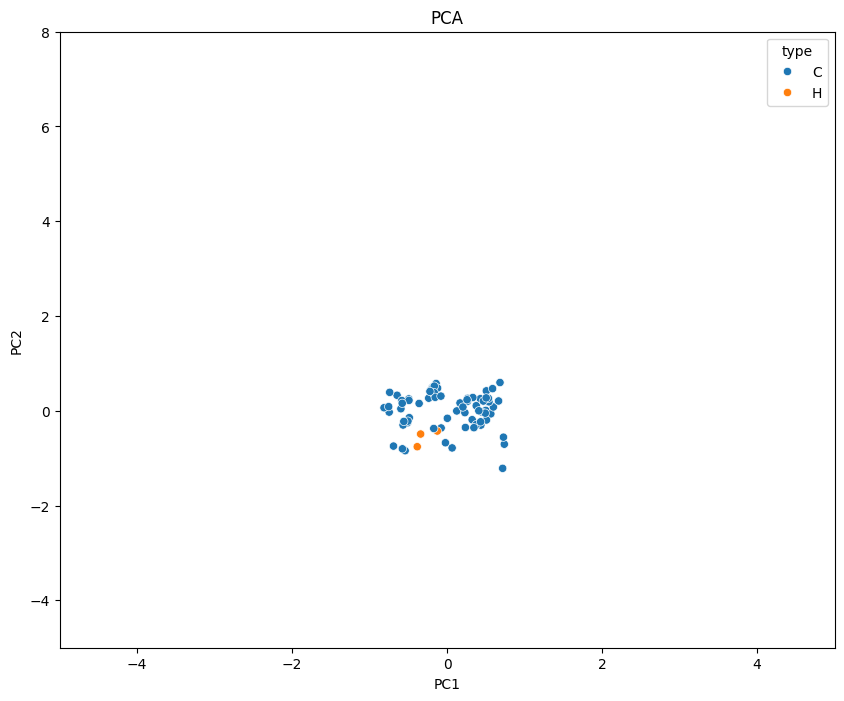

In [57]:
wanted_vars = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']

cereal_df.dropna(inplace=True)

scaler = MinMaxScaler()
scaled_cereal_df = scaler.fit_transform(cereal_df[wanted_vars])

pca = PCA(n_components=2)
pca.fit(scaled_cereal_df)

pca_cereal_df = pca.transform(scaled_cereal_df)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_cereal_df[:, 0], y=pca_cereal_df[:, 1], hue=cereal_df['type'])
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-5, 5)
plt.ylim(-5, 8)
plt.show()